Data Preprocessing

In [ ]:
#importing libraries
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the dataset directory
data_path=r'./drive/MyDrive/Colab Notebooks/rp/Dataset2'

# Get the list of categories (subdirectories) in the dataset directory
categories = os.listdir(data_path)

# Create numerical labels for each category
labels = np.arange(len(categories))

# Create a dictionary to map categories to labels
label_dict = dict(zip(categories, labels))

# Print the label dictionary, categories, and labels
print(label_dict)
print(categories)
print(labels)

{'Black Mould': 0, 'Cobweb': 1, 'Mite': 2, 'Green Mold': 3, 'Bacterial blotch': 4, 'Healthy': 5}
['Black Mould', 'Cobweb', 'Mite', 'Green Mold', 'Bacterial blotch', 'Healthy']
[0 1 2 3 4 5]


In [ ]:
# Desired size for the images
img_size = 224

# Lists to store the preprocessed data and corresponding labels
data = []
target = []

# Iterate over each category
for category in categories:
    # Get the path to the current category's folder
    folder_path = os.path.join(data_path, category)

    # Get the list of image names in the current category's folder
    img_names = os.listdir(folder_path)

    # Iterate over each image in the current category
    for img_name in img_names:
        # Get the path to the current image
        img_path = os.path.join(folder_path, img_name)

        # Read the image using OpenCV
        img = cv2.imread(img_path)

        try:
            # Resize the image to the desired size
            resized = cv2.resize(img, (img_size, img_size))

            # Append the resized image to the data list
            data.append(resized)
            target.append(label_dict[category])

        # If any exception is raised, print the exception and proceed to the next image
        except Exception as e:
            print(e)

In [ ]:
# Convert the data and target lists to numpy arrays
data = np.array(data)
target = np.array(target)

In [ ]:
print(data.shape, target.shape)

(1083, 224, 224, 3) (1083,)


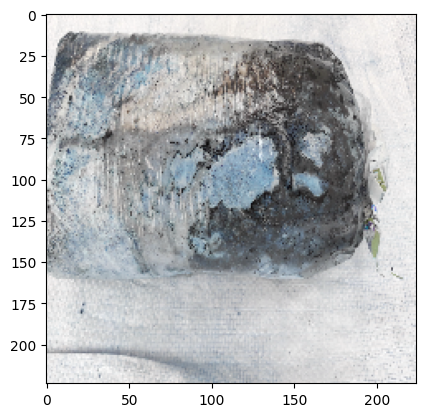

In [ ]:
testimg = plt.imshow(data[129])

Data Augmentation

In [ ]:
# Apply data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Preprocess and augment the data
data_augment = []
target_augment = []
for i in range(data.shape[0]):
    img = data[i]
    label = target[i]
    img = img.reshape((1,) + img.shape)
    target_arr = np.array([label])

    for img_aug, label_aug in datagen.flow(img, target_arr, batch_size=1):
        data_augment.append(img_aug[0])
        target_augment.append(label_aug[0])
        break

In [ ]:
# Convert the augmented data and target lists to numpy arrays
data_augment = np.array(data_augment)
target_augment = np.array(target_augment)


In [ ]:
# Normalize the data by scaling the pixel values between 0 and 1
data_augment = data_augment / 255.0

In [ ]:
# Perform one-hot encoding on the target labels
target_augment = np_utils.to_categorical(target_augment)

The above code segments perform some necessary proprocessing task for data and target

1.```data_augment=np.array(data_augment) and data_augment = data_augment/255.0``` - Dividing all the pixels in all the images by 255 in order to convert them to the range 0-1.
This is to reduce the complexity in training the Neural Network.

2.```target_augment=np_utils.to_categorical(target)``` - Converting the labels into categorical representation.

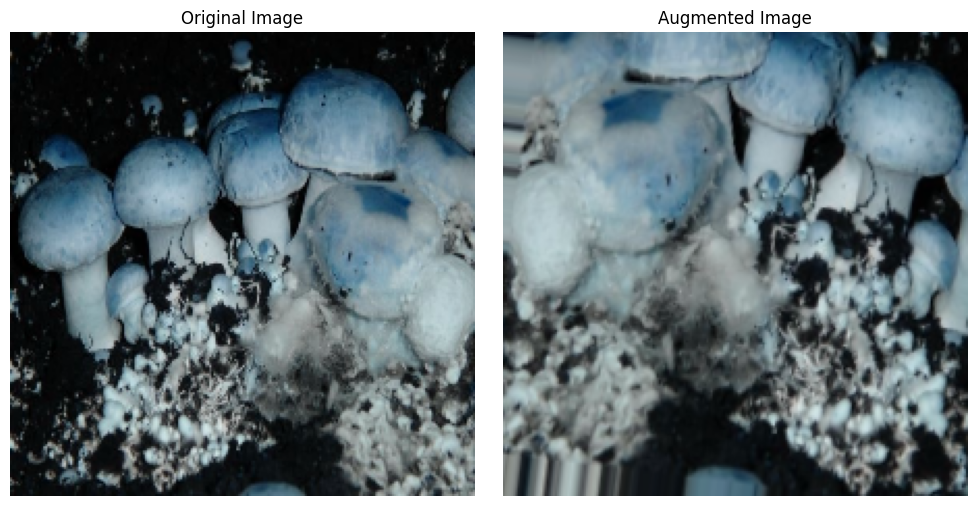

In [ ]:
# Choose an index to visualize
visualize_index = 250

# Visualize the original and augmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(data[visualize_index])
plt.title("Original Image")
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(data_augment[visualize_index])
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Save the preprocessed data and target arrays as numpy arrays
np.save('/content/drive/MyDrive/Colab Notebooks/rp/data-preprocessed-disease', data_augment)
np.save('/content/drive/MyDrive/Colab Notebooks/rp/target-preprocessed-disease', target_augment)

Saving data and target as numpy array files

In [ ]:
# Print the shape of the target_new array
print(target_augment.shape)

(1083, 6)
